Top predictors of 'participating':
                    feature  importance
0               subscribers    0.195581
7            num_moderators    0.175765
8                 num_rules    0.161676
1              active_users    0.150064
2             subreddit_age    0.123243
5   comment_score_hide_mins    0.066948
9                is_default    0.023570
16        has_automod_False    0.021142
17         has_automod_True    0.020232
6              allow_images    0.019395


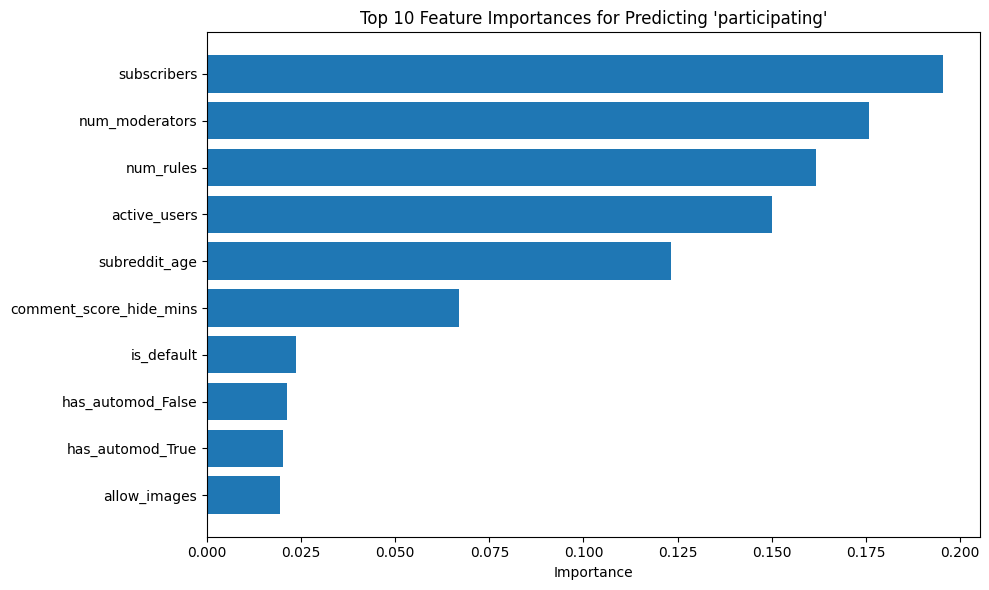

In [7]:
import json
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset
with open("/Users/preethi/Documents/Spring25/SC/SCProject/CS6474/features/final_all.json", "r") as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)

# Separate target variable
y = df["participating"]

# Drop non-predictive or identifier columns
X = df.drop(columns=["name", "title", "description", "participating"])

# One-hot encode categorical columns
X = pd.get_dummies(X)

# Split data (optional but good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get feature importance
importances = clf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({"feature": feature_names, "importance": importances})
importance_df = importance_df.sort_values("importance", ascending=False)

# Print top predictors
print("Top predictors of 'participating':")
print(importance_df.head(10))

# Optional: visualize
plt.figure(figsize=(10, 6))
plt.barh(importance_df.head(10)["feature"][::-1], importance_df.head(10)["importance"][::-1])
plt.xlabel("Importance")
plt.title("Top 10 Feature Importances for Predicting 'participating'")
plt.tight_layout()
plt.show()


Top features increasing likelihood of participation:
                   feature   coefficient     abs_coeff
5  comment_score_hide_mins  8.198541e-04  8.198541e-04
3                     nsfw  4.309782e-05  4.309782e-05
0              subscribers  1.046667e-07  1.046667e-07
2            subreddit_age  1.019953e-09  1.019953e-09

Top features decreasing likelihood of participation:
                    feature  coefficient  abs_coeff
7            num_moderators    -0.048328   0.048328
8                 num_rules    -0.006005   0.006005
1              active_users    -0.000588   0.000588
13         has_automod_True    -0.000294   0.000294
6              allow_images    -0.000226   0.000226
4               ad_friendly    -0.000148   0.000148
12     cultural_capital_low    -0.000129   0.000129
9                is_default    -0.000043   0.000043
10  user_social_capital_low    -0.000015   0.000015
11     economic_capital_low    -0.000012   0.000012


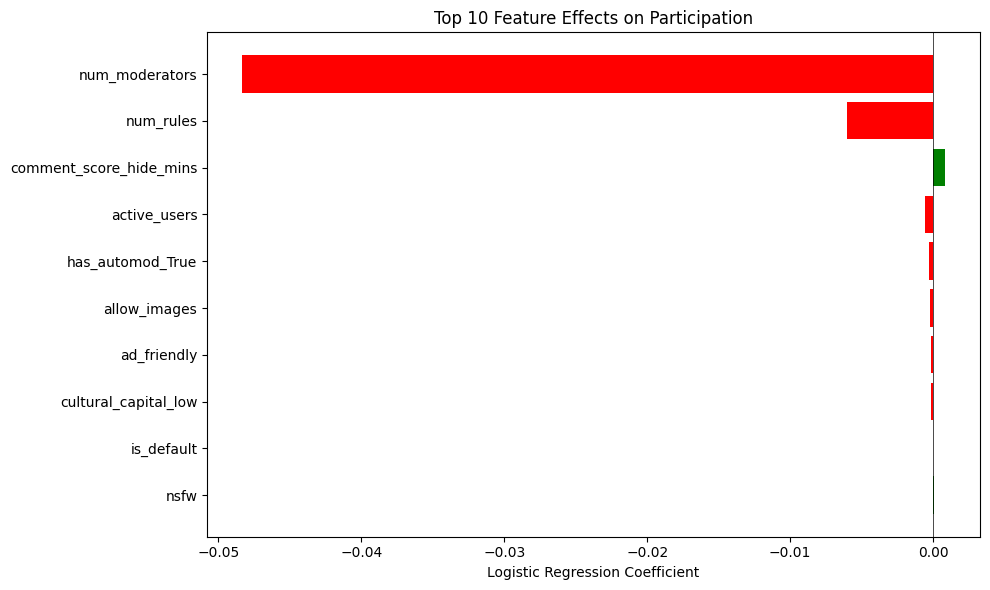

In [9]:
import json
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset
with open("/Users/preethi/Documents/Spring25/SC/SCProject/CS6474/features/final_all.json", "r") as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)

# Separate target variable
y = df["participating"]

# Drop non-predictive or identifier columns
X = df.drop(columns=["name", "title", "description", "participating"])

# One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)
X = X.fillna(0)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Extract coefficients
coefficients = model.coef_[0]
feature_names = X.columns
coef_df = pd.DataFrame({"feature": feature_names, "coefficient": coefficients})
coef_df["abs_coeff"] = coef_df["coefficient"].abs()
coef_df = coef_df.sort_values("abs_coeff", ascending=False)

# Print top positive and negative predictors
print("Top features increasing likelihood of participation:")
print(coef_df[coef_df["coefficient"] > 0].head(10))

print("\nTop features decreasing likelihood of participation:")
print(coef_df[coef_df["coefficient"] < 0].head(10))

# Optional: visualize top coefficients
top_n = 10
plt.figure(figsize=(10, 6))
top_features = coef_df.head(top_n)
colors = ['green' if c > 0 else 'red' for c in top_features["coefficient"]]
plt.barh(top_features["feature"][::-1], top_features["coefficient"][::-1], color=colors[::-1])
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel("Logistic Regression Coefficient")
plt.title(f"Top {top_n} Feature Effects on Participation")
plt.tight_layout()
plt.show()
